<a href="https://colab.research.google.com/gist/AndrejFTN/e26443e6710a752e556d999a85148142/pppo_klasifikacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKACIJA PASA

Student: Andrej Pažin IT68/2020
Predmet: Principi prezentacije i prepoznavanja oblika

**Sadržaj**

*  Uvod
*  Klasifikacija
*  Klasifikacija slika
*  Zaključak   

**Uvod**

Cilj ovog istraživačkog rada je proučiti i analizirati primenu tehnika mašinskog učenja, uključujući duboko učenje, za rešavanje problema obrade fotografije.

U fokusu projekta je klasifikacija rasa pasa, gde je razvijen model koji ima sposobnost prepoznavanja rase psa na osnovu slike koja mu je data.

Podaci za obuku modela sadrže slike pasa, organizovane u šest foldera - "Bedlington_terrier", "Bernese_mountain_dog","Dandie_Dinmont","Gordon_setter","Ibizan_hound","Norwegian_elkhound".

Razlika u ovom slučaju je to što u ovim folderima se nalazi manji broj slika potrebnih za prezentovanje modela. Zbog toga u ovom dataset-u  nema csv fajlova za dodatno filtriranje kao ni posebnih foldera za testiranje.

Cilj rada je iskoristiti ove podatke i primeniti tehnike mašinskog učenja, posebno dubokog učenja, kako bismo izgradili efikasan model koji će tačno klasifikovati rase pasa na osnovu novih fotografija. Ovakav model može imati potencijalnu primenu u različitim oblastima, kao što su unapređenje sistema za pronalaženje izgubljenih pasa, praćenja životinjskih populacija i slično.

Link do dataset-a je: https://drive.google.com/file/d/1v6aQDKSOBlsufA4wwImuur7CJO2AHonS/view


# KLASIFIKACIJA

**KLASIFIKACIJA**

Klasifikacija je osnovni zadatak nadgledanog mašinskog učenja. Njen cilj je naučiti model kako da poveže ulazne podatke sa odgovarajućim izlaznim klasama na osnovu već unapred poznatih parova ulaza i izlaza. To znači da se model obučava koristeći trening podatke i nakon toga se koristi za predviđanje novih, do tada neviđenih podataka.

Izraz "nadgledano učenje" se odnosi na to da se proces izvršava nad parovima primera i tačnim izlaznim oznakama. Ti podaci su osnova za obučavanje modela i pružaju mu smernice o tome kako precizno da klasifikuje neviđene podatke.

Postoje različite vrste klasifikacije:

1.**Binary**: Kada postoji samo dve moguće klase na koje model može klasifikovati podatke. Cilj ove klasifikacije jeste da se predvidi pripadnost podataka jednoj od te dve klase na osnovu informacija iz trening skupa koji sadrži unapred označene uzorke za obe klase. Primer ove vrste jeste prilikom klasifikacije pacijenata u dve klase "bolesni" i "zdravi".

2.**Multi-Class:**Kada postoji više od dve klase, i model treba da klasifikuje podatke u jednu od tih više klasa. Na primer, klasifikacija različitih tipova voća gde možemo imati klase kao jabuka, banana, pomorandža, itd.

3.**Multi-Label:** Ova vrsta klasifikacije omogućava da jedna instanca podataka pripada jednoj ili više klasa istovremeno. Na primer, klasifikacija slika životinja, gde jedna slika može sadržati više životinja, i model treba za svaku životinju na slici predvideti odgovarajuću klasu.

4.**Unbalanced:** Kada je broj instanci u svakoj klasi nejednako raspoređen, i jedna ili nekoliko klasa ima mnogo više ili mnogo manje podataka u odnosu na druge klase. Nedostatak ove vrste klasifikacije je to što model može biti "pristrasan" prema većoj klasi i samim tim manje precizno klasifikovati objekte koji pripadaju manje zastupljenim klasama.

# KLASIFIKACIJA SLIKA

**KLASIFIKACIJA SLIKA**

Klasifikacija slika predstavlja dodeljivanje najverovatnije kategorije kojoj pripada fotogafija iz nekog skupa fiksnih kategorija.

Postoje dva tipa klasifikatora slika:

1.Klasifikacija pomoću karakteristika koje su uočene na fotografijama,

2.Kada se duboka neuronska mreža obučava za klasifikovanje fotografija.

Izrada projekta je započeta tako što je prvo instaliran paket Python paket gdown, koji omogućava preuzimanje datoteka sa datog Google Drive-a u okviru specifikacije projekta

In [3]:
!pip install gdown

Nakon preuzimanja, potrebno je importovati gdown paket, kako bi se preuzeo zipovan dataset koji sadrži podatke za klasifikaciju pasa. Podešava se adresa sa koje se preuzima zipovani dataset, kao i putanja i datoteka gde će se on sačuvati.

In [4]:

import gdown

url = 'https://drive.google.com/uc?id=1v6aQDKSOBlsufA4wwImuur7CJO2AHonS'
output = '/content/Dog_Breed_Classification_2.zip'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1v6aQDKSOBlsufA4wwImuur7CJO2AHonS
To: /content/Dog_Breed_Classification_2.zip
100%|██████████| 9.68M/9.68M [00:00<00:00, 23.6MB/s]


'/content/Dog_Breed_Classification_2.zip'

Potrebno je prvo otpakovati zip folder

In [5]:
!unzip Dog_Breed_Classification_2.zip

Archive:  Dog_Breed_Classification_2.zip
  inflating: data/Bedlington_terrier/Bedlington_terrier_1.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_10.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_100.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_101.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_102.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_103.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_104.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_105.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_106.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_107.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_108.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_109.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_11.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_110.jpg  
  inflating: data/Bedlington_terrier/Be

U narednom koraku vrši se raspakivanje zip-a, i definisanje labela za
foldore unutar zip-a

In [6]:
import numpy as np
from PIL import Image
import zipfile

def normalize_images_from_zip(zip_path, folders):
    normalized_images = []
    labels = []
    fileNames = []
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for label, folder in enumerate(folders):
            print(label)
            print(folder)
            file_list = zip_ref.namelist()
            for file in file_list:
                if file.startswith(folder) and file.endswith('.jpg'):
                    with zip_ref.open(file) as img_file:
                        fileNames.append(img_file.name)
                        img = Image.open(img_file)
                        img = img.resize((image_width, image_height))
                        img_array = np.array(img)
                        normalized_img = img_array / 255.0
                        normalized_images.append(normalized_img)
                        labels.append(label)
    return normalized_images, labels, fileNames


zip_path = '/content/Dog_Breed_Classification_2.zip'

folders = ["data/Bedlington_terrier", "data/Bernese_mountain_dog", "data/Dandie_Dinmont", "data/Gordon_setter", "data/Ibizan_hound", "data/Norwegian_elkhound"]

image_width = 224
image_height = 224

normalized_images, labels, fileNames = normalize_images_from_zip(zip_path, folders)

0
data/Bedlington_terrier
1
data/Bernese_mountain_dog
2
data/Dandie_Dinmont
3
data/Gordon_setter
4
data/Ibizan_hound
5
data/Norwegian_elkhound


Za uvoz biblioteka TensorFlow i TensorFlow Hub u Python kodu koristimo sledeći kod:

In [7]:
import tensorflow as tf
import tensorflow_hub as hub

Nakon što se biblioteke uvezu, možemo koristiti sve funkcionalnosti koje one pružaju za mašinsko učenje i duboko učenje.

TensorFlow biblioteka pruža različite funkcionalnosti za mašinsko učenje i duboko učenje. TensorFlow API se koristi za izgradnju, treniranje i evaluaciju modela. TensorFlow je postao jedan od najpopularnijih alata za izgradnju i treniranje neuronskih mreža.

TensorFlow Hub biblioteka pruža prethodno obučene modele, tzv. modulima, koji se mogu koristiti za različite zadatke u mašinskom učenju. Olakšava korišćenje prethodno obučenih modela kao slojeva u ovom modelu.

Da bismo proverili verzije TensorFlow i TensorFlow Hub biblioteka koje su trenutno instalirane, možemo koristiti sledeći kod:

In [8]:
print("Verzija TensorFlow biblioteke:", tf.__version__)
print("Verzija TensorFlow Hub biblioteke:", hub.__version__)

Verzija TensorFlow biblioteke: 2.15.0
Verzija TensorFlow Hub biblioteke: 0.16.1


Importovanje alata za manipulaciju slika i provera da li je sve importovano kako treba. Importovanje funkcije display i Image iz IPython.display modula, alata za manipulaciju slika. Ove funkcije se koriste za prikazivanje slika. Zatim se proverava uspešnost prikazivanja slike

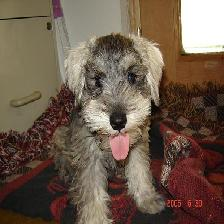

In [9]:
from IPython.display import display, Image
Image("/content/data/Bedlington_terrier/Bedlington_terrier_1.jpg")

Prikazivanje generisane liste *filenames* koja sadrži putanje do slika pasa na osnovu labele foldera. Listu se koristi za dalju obradu ili prikazivanje slika.

In [10]:
fileNames[:10]

['data/Bedlington_terrier/Bedlington_terrier_1.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_10.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_100.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_101.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_102.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_103.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_104.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_105.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_106.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_107.jpg']

Prikaz slike na putanji fileNames[50] koja predstavlja određenu sliku psa iz dataset-a.

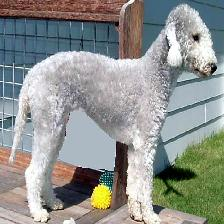

In [11]:
from IPython.display import Image
Image(fileNames[50])

Razdvajanje stringa imena fajla kako bi dobili naziv psa radi dalje obrade

In [12]:

def breed(fileName):
    parts=fileName.split('/')
    return parts[1]


print(breed(fileNames[555]))


Ibizan_hound


Pravljenje funkcije koja vraca rasu psa na osnovu broja labele

In [63]:
def breed_label(index):
   return breed(fileNames[index])


print(breed_label(50))

Bedlington_terrier


Raznolikost rasa pasa u dataset-u

Korišćenje funkcije np.unique() iz biblioteke NumPy kako bi se izdvojile jedinstvene vrednosti iz niza labels i vratio broj jedinstvenih rasa pasa. Vrednost koju dobijamo funkcijom len(unique_breeds) nam daje informaciju koliko različitih klasa ili oznaka rasa pasa ima u skupu podataka i korisno je za razumevanje raznolikosti podataka.

In [61]:
import numpy as np

unique_breeds = np.unique(labels)
len(unique_breeds)


6

Naredna naredba se koristi za kreiranje nove liste boolean_labels koja će sadržavati True/False vrednosti za svaku oznaku rase pasa iz niza labels, u odnosu na unikatne vrednosti u nizu unique_breeds. Lista boolean_labels će imati istu dužinu kao i niz labels, i svaki element u njoj će biti True ako odgovarajući element u nizu labels (oznaka rase psa) pripada jednoj od unikatnih vrednosti u nizu unique_breeds, inače će biti False.

In [14]:
boolean_labels = [label == unique_breeds for label in labels ]

Prikaz prve dve boolean vrednosti iz liste boolean_labels.

In [15]:
boolean_labels[:2]

[array([ True, False, False, False, False, False]),
 array([ True, False, False, False, False, False])]

Kreirani nizovi se smeštaju u promenjive X i y.

In [16]:
X = fileNames
y = boolean_labels

Provera pojavljivanja jedinstvenih vrsta u nizu - proverava se da li prva vrednost u nizu labels odgovara nekom od jedinstvenih vrednosti u nizu unique_breeds. Ukoliko izraz vrati vrednost true, to znači da je prvi element niza labels jednak prvoj unikatnoj vrednosti u nizu unique_breeds

In [17]:
labels[0] == unique_breeds

array([ True, False, False, False, False, False])

Importovanje i korišćenje funkcije imread iz biblioteke matplotlib.pyplot za čitanje slike sa određene putanje filenames[34] i vraća dimenzije slike i njen format (visina, širina, broj kanala). image.shape prikazuje dimenzije učitane slike u obliku (height, width, channels), gde height prikazuje visinu slike, width širinu, a channels predstavlja broj kanala slike (obično 3 za RGB slike ili 1 za crno-bele slike)

In [18]:
from matplotlib.pyplot import imread
image = imread(fileNames[34])
image.shape

(224, 224, 3)

Varijabli image dodeljene su vrednosti slikovnog niza i predstavlja reprezentaciju slike u obliku trodimenzionalnog numpy niza - promenljiva koja sadrži informacije o pikselima slike i omogućava manipulaciju i analizu slike koristeći različite operacije i biblioteke.

array([[[ 28,  13,   6],
        [ 27,  12,   5],
        [ 27,  12,   5],
        ...,
        [  5,   5,   5],
        [  3,   3,   3],
        [  1,   1,   1]],

       [[ 29,  14,   7],
        [ 29,  14,   7],
        [ 28,  13,   6],
        ...,
        [  6,   6,   6],
        [  4,   4,   4],
        [  2,   2,   2]],

       [[ 30,  15,   8],
        [ 29,  14,   7],
        [ 28,  13,   6],
        ...,
        [  5,   5,   5],
        [  3,   3,   3],
        [  1,   1,   1]],

       ...,

       [[103,  89,  76],
        [100,  86,  73],
        [ 98,  84,  71],
        ...,
        [241, 226, 229],
        [228, 212, 215],
        [223, 208, 211]],

       [[111,  95,  82],
        [104,  88,  75],
        [ 96,  82,  69],
        ...,
        [221, 205, 208],
        [212, 193, 197],
        [210, 194, 197]],

       [[114,  98,  85],
        [103,  87,  74],
        [ 92,  78,  65],
        ...,
        [224, 205, 209],
        [219, 200, 204],
        [224, 205, 209]]], dtype=uint8)
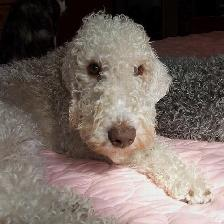

In [19]:
image

Konvertuje se slikovni niz image u TensorFlow konstantu, pri čemu prikazuje prva dva elementa. TensorFlow konstanta zadržava trodimenzionalnu strukturu slike, kao i originalne vrednosti piksela.

In [20]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 224, 3), dtype=uint8, numpy=
array([[[28, 13,  6],
        [27, 12,  5],
        [27, 12,  5],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 1,  1,  1]],

       [[29, 14,  7],
        [29, 14,  7],
        [28, 13,  6],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 2,  2,  2]]], dtype=uint8)>

Definišemo funkciju process_image, koja kao ulazni argument prima putanju do slike, i zatim sprovodi obradu slike koristeći funkcionalnosti TensorFlow biblioteke. Ova obrada uključuje dekodiranje slike, promenu veličine i konvertovanje tipa slike kako bi bile u prikladnom formatu za dalju obradu. Konkretno, koraci koje funkcija sprovodi su sledeći:

image = tf.io.read_file(image_path): Učitava sliku sa putanje image_path u obliku bajtova.

image = tf.image.decode_jpeg(image, channels=3): Dekodira sliku u JPEG formatu i postavlja broj kanala na 3.

image = tf.image.convert_image_dtype(image, tf.float32): Konvertuje vrednosti piksela u tip float32 i normalizuje ih na opseg [0, 1]. Ovo je važno jer neuronske mreže rade sa normalizovanim vrednostima.

image = tf.image.resize(image, size=[image_size, image_size]): Menja veličinu slike na željenu dimenziju. Ovo je neophodno kako bi se obezbedio isti ulazni format slika za model.

Ovako definisana funkcija obezbeđuje pripremu slika u format pogodan za dalju obradu, što je važan korak u radu sa neuronskim mrežama.

In [21]:
image_size = 224

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[image_size, image_size])
  return image

Definiše se funkcija get_image_labels koja prihvata sliku i vrstu psa, a onda sliku šalje na obradu pa je nazad vraća obrađenu zajedno sa vrstom.

In [22]:
def get_image_labels(image_path, label):
  image = process_image(image_path)
  return image, label

Pristupanje obrađenoj slici i konstantnoj oznaci za određeni indeks u skupu podataka. Izraz koji koristi funkciju process_image za obradu slike sa putanje X[34] i konvertuje odgovarajuću oznaku y[34] u TensorFlow konstantu. Ovaj izraz vraća par koji se sastoji od obrađene slike i konstante oznake.

In [23]:
(process_image(X[34]), tf.constant(y[34]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.10196079, 0.0509804 , 0.01568628],
         [0.10196079, 0.0509804 , 0.01568628],
         [0.10196079, 0.0509804 , 0.01568628],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.01176471, 0.01176471, 0.01176471],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.10980393, 0.05882353, 0.02352941],
         [0.10588236, 0.05490196, 0.01960784],
         [0.10196079, 0.0509804 , 0.01568628],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.01568628, 0.01568628, 0.01568628],
         [0.00784314, 0.00784314, 0.00784314]],
 
        [[0.1137255 , 0.0627451 , 0.02745098],
         [0.10980393, 0.05882353, 0.02352941],
         [0.10588236, 0.05490196, 0.01960784],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.4039216 , 0.34901962

Definisanje funkcije show_20_images koja prikazuje 20 random izgenerisanih slika iz skupa podataka u odredjenom range-u, zajedno sa odgovarajućim oznakama.

In [84]:
import matplotlib.pyplot as plt
import random

def show_20_images(images, labels):
  plt.figure(figsize=(10,10))
  rnd = random.randint(0,600)
  j = 0
  for i in range(rnd, rnd+20):
    ax = plt.subplot(5,5,j+1)
    j=j+1
    plt.imshow(images[i])
    plt.title(breed_label(i))
    plt.axis("off")

Definisana je funkcija create_batches koja kreira pakete (batches) podataka za treniranje, validaciju ili testiranje, na osnovu ulaznih podataka X i y. Predstavlja kreiranje funkcije za kreiranje "serija" koje olakšavaju gore navedene procese. Podaci se konvertuju, menjaju im se dimenzije i vrši se mešanje podataka kako bi se kasnije lakše izvršili procesi treniranja, validacije ili testiranja.

In [25]:
batch_size = 32

def create_batches(X, y=None, batch_size=batch_size):
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
      data_batch = data.map(get_image_labels).batch(batch_size)
      return data_batch


Kreiranje paketa podataka za validaciju

In [26]:
valid_data = create_batches(X, y)

Vraća informacije o elementima - o strukturi i tipovima podataka u skupovima podataka valid_data.

In [27]:
valid_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 6), dtype=tf.bool, name=None))

Prikaz 20 slika na osnovu istreniranih slika i vrsta.

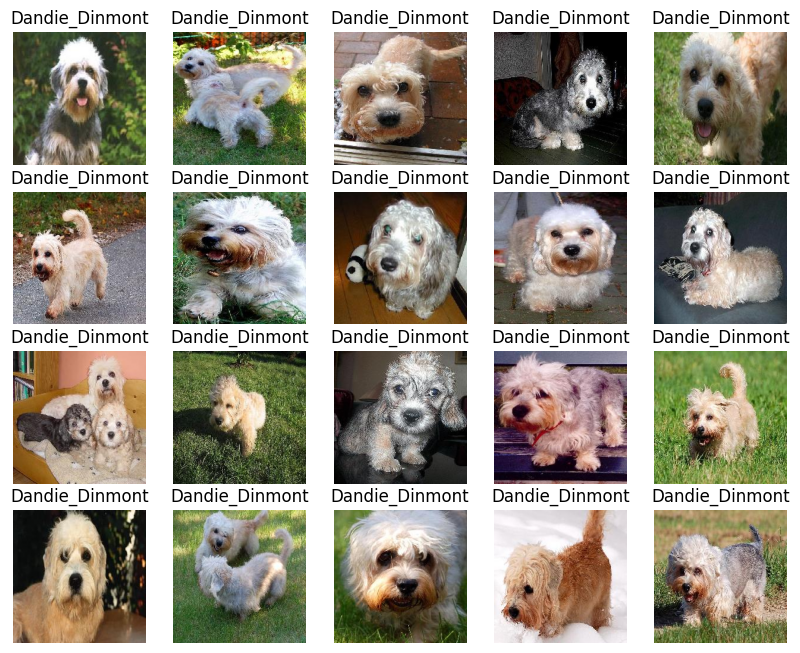

In [92]:
show_20_images(normalized_images, labels)

Priprema parametara za kreiranje modela. Ove promenljive definišu karakteristike ulaznog oblika, izlaznog oblika i URL adrese modela koji će biti korišćeni u daljem procesu izgradnje modela i obučavanja - MobileNet v2 sa odgovarajućim konfiguracijama, tj. link za učitavanje modela MobileNet v2 iz TensorFlow Hub-a.

In [28]:
input_shape = [None, image_size, image_size, 3]
output_shape = len(unique_breeds)
Model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Kreira se funkcija create_model koja se koristi za kreiranje modela za klasifikaciju slika na osnovu zadatih ulaznih parametara, koristeći preneseno učenje odnosno transfer learning. Koristi se unapred obučen model (sa prethodno uvedenog linka) za izdvajanje karakteristika iz ulaznih slika i dodaje se "debeli" sloj na vrh radi klasifikacije. Model se onda kompajlira sa odgovarajućim podešavanjima gubitka, optimizatora i metrika.

In [29]:
def create_model(input_shape=input_shape, output_shape=output_shape, model_url = Model_url):
  print("Building model with: ", model_url)

  model = tf.keras.Sequential([hub.KerasLayer(model_url),
                               tf.keras.layers.Dense(units = output_shape, activation="softmax")])
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(input_shape)
  return model

Kreira se instanca modela za klasifikaciju slika na osnovu prethodno definisanih ulaznih parametara. Nakon toga se prikazuju karakteristike modela.

In [30]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 5438725 (20.75 MB)
Trainable params: 6012 (23.48 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


Komanda koja omogućava učitavanje i korišćenje TensorBoard alata za vizualizaciju i analizu modela mašinskog učenja.

TensorBoard je alat koji dolazi uz TensorFlow biblioteku i omogućava interaktivno praćenje metrika, vizualizaciju grafova modela, analizu performansi.

In [31]:
%load_ext tensorboard

Kreira se funkcija tensorboard_callback koja definiše povratni poziv (callback) za TensorBoard i koja prilikom treniranja modela beleži sve logove i prenosi ih do TensorBoard-a gde će se oni i prikazivati.

In [32]:
import datetime
import os

def tensorboard_callback():
  logdir = os.path.join("/content/data/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

Definisanje povratnog poziva za "rani prekid" treniranja kako bi se automatski zaustavio proces treniranja neuronske mreže kada se određeni kriterijum zaustavljanja ispuni. U ovom slučaju, kriterijum zaustavljanja je zasnovan na praćenju tačnosti (accuracy) modela na validacionom skupu podataka. monitor='val_accuracy': Ovo znači da će povratni poziv pratiti tačnost (accuracy) modela na validacionom skupu podataka tokom procesa treniranja. patience=3: Ovo određuje koliko epoha (iteracija treniranja) može proći bez poboljšanja na validacionom skupu, pre nego što se proces treniranja zaustavi. U ovom slučaju, ako tačnost na validacionom skupu ne poboljšava najmanje 3 epohe za redom, treniranje će biti zaustavljeno.

In [33]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

Promenljiva koja definiše maksimalni broj epoha, odnosno broj puta koliko će se model obučavati na celom skupu podataka.

In [34]:
Num_epochs=25

U narednom koraku varijabla predictions dobija rezultate predikcije modela na validacionim podacima. Nakon izvršavanja, rezultati predikcije se mogu dalje koristiti za evaluaciju performansi modela, generisanje matrice konfuzije, izračunavanje tačnosti i drugih metrika

In [35]:
predictions = model.predict(valid_data, verbose=1)
predictions

24/24 [==============================] - 40s 2s/step


array([[0.03601331, 0.01024769, 0.02544243, 0.78522235, 0.04502507,
        0.09804916],
       [0.10064857, 0.1709853 , 0.07035924, 0.52325463, 0.00913988,
        0.12561233],
       [0.01202553, 0.00625947, 0.37319145, 0.46576527, 0.0164446 ,
        0.12631373],
       ...,
       [0.01373413, 0.03681939, 0.01844895, 0.24014883, 0.62669945,
        0.06414927],
       [0.00752074, 0.00623176, 0.01536482, 0.33143693, 0.59158194,
        0.04786383],
       [0.15418243, 0.03397416, 0.01164633, 0.6604834 , 0.11920959,
        0.02050405]], dtype=float32)

Definiše se funkcija get_prediction_label koja na osnovu niza verovatnoća predviđanja za određeni ulazni podatak rasu koja ima najvišu verovatnoću pojavljivanja.

In [36]:
def get_prediction_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
prediction_label = get_prediction_label(predictions[0])
prediction_label

3

Definiše se funkcija unbatchify koja se koristi za konverziju unapređenog skupa podataka u posebnu listu slika i listu naziva rasa. Omogućava pristup pojedinačnim slikama i oznakama za dalju analizu.

In [95]:
def unbatchify(data):
  images=[]
  labels=[]
  cnt = 0
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(breed_label(cnt))
    cnt = cnt+1
  return images, labels
valid_images, valid_labels = unbatchify(valid_data)
valid_images[0], valid_labels[0]

(array([[[0.43529415, 0.40000004, 0.27058825],
         [0.43529415, 0.40000004, 0.27058825],
         [0.43921572, 0.4039216 , 0.27450982],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.4431373 , 0.40784317, 0.2784314 ],
         [0.44705886, 0.41176474, 0.28235295],
         [0.44705886, 0.41176474, 0.28235295],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.45882356, 0.42352945, 0.29411766],
         [0.45882356, 0.42352945, 0.29411766],
         [0.46274513, 0.427451  , 0.29803923],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        ...,
 
        [[0.19607845, 0.1137255 , 0.00784314],
         [0.19607845, 0.1137255 , 0.     

Kreira se funkcija plot_prediction koja omogućava prikazivanje slike sa naslovom koji prikazuje predviđenu oznaku, verovatnoću predviđanja i stvarnu oznaku, čime se vizualizuju rezultati predviđanja za određenu sliku. Ova funkcija prima sledeće argumente: niz verovatnoća predikcija za svaki unos, niz pravih oznaka za svaki unos, koje predstavljaju stvarne klase, niz ulaznih podataka za koje se vrši predikcija i indeks unosa za koji se želi prikazati predikcija

In [37]:
def plot_prediction(prediction_prob, labels, images, n=1):
  pred_prob, label, image = prediction_prob[n], labels[n], images[n]
  pred_label = get_prediction_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == label:
    color="green"
  else:
    color="red"

  plt.title("{}{:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, label), color=color)

Kreira se celokupni skup podataka u obliku batch-eva za sve slike i oznake iz skupa podataka.

In [38]:
full_data = create_batches(X, y)

Kreira se novi model koji je spreman za treniranje ili evaluaciju na celokupnom skupu podataka.

In [39]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Definišu se povratni pozivi za praćenje performansi modela tokom treniranja i za rano zaustavljanje obučavanja na osnovu tačnosti modela.

In [40]:
full_model_tensorboard = tensorboard_callback()
full_model_earlystop = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

Ponovno treniranje modela na osnovu svih podataka.

In [41]:
Num_epochs=50
full_model.fit(full_data, epochs=Num_epochs, callbacks=[full_model_tensorboard, full_model_earlystop])

Epoch 1/50
24/24 [==============================] - 41s 2s/step - loss: 2.2474 - accuracy: 0.2540
Epoch 2/50
24/24 [==============================] - 37s 2s/step - loss: 0.1178 - accuracy: 0.9867
Epoch 3/50
24/24 [==============================] - 45s 2s/step - loss: 0.0531 - accuracy: 0.9947
Epoch 4/50
24/24 [==============================] - 37s 2s/step - loss: 0.0383 - accuracy: 0.9987
Epoch 5/50
24/24 [==============================] - 38s 2s/step - loss: 0.0289 - accuracy: 0.9987
Epoch 6/50
24/24 [==============================] - 40s 2s/step - loss: 0.0229 - accuracy: 1.0000
Epoch 7/50
24/24 [==============================] - 39s 2s/step - loss: 0.0188 - accuracy: 1.0000
Epoch 8/50
24/24 [==============================] - 40s 2s/step - loss: 0.0158 - accuracy: 1.0000
Epoch 9/50
24/24 [==============================] - 38s 2s/step - loss: 0.0135 - accuracy: 1.0000


Čuvanje istreniranih podataka.

In [42]:
full_model.save('/content/data/full-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Definiše se putanja do direktorijuma koji sadrži  slike jednog foldera i kreira lista putanja do svih  slika, tj.  filenames niza za taj folder u ovom slucaju Bedlington.




In [43]:
test_path = "/content/data/Bedlington_terrier/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/data/Bedlington_terrier/Bedlington_terrier_77.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_20.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_70.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_89.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_95.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_23.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_48.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_81.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_79.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_90.jpg']

Dobija se povratna informacija o performansi modela na skupu podataka

In [93]:

full_model.evaluate(valid_data)

24/24 [==============================] - 42s 2s/step - loss: 0.0118 - accuracy: 1.0000


[0.011845400556921959, 1.0]

Predviđanja modela na skupu podataka

In [44]:
predictions = full_model.predict(valid_data, verbose=1)
predictions

24/24 [==============================] - 38s 2s/step


array([[6.5754378e-01, 1.8017292e-02, 2.3977579e-01, 1.0141151e-02,
        2.0465279e-02, 5.4056644e-02],
       [9.9909663e-01, 1.3804123e-04, 2.7668301e-04, 4.3778862e-05,
        1.7332158e-04, 2.7155204e-04],
       [9.9629736e-01, 4.7839440e-05, 2.0350190e-03, 1.2516793e-03,
        1.3866373e-04, 2.2928859e-04],
       ...,
       [1.1995062e-05, 3.2675620e-05, 2.0865224e-05, 2.6549113e-05,
        3.6640253e-05, 9.9987125e-01],
       [2.0751684e-04, 7.0383809e-05, 3.6127763e-05, 6.2241576e-05,
        1.6722141e-04, 9.9945652e-01],
       [4.0899906e-03, 1.2914110e-04, 7.2637610e-03, 1.1625087e-04,
        1.0091742e-03, 9.8739159e-01]], dtype=float32)

Vizuelni prikaz rezultata predviđanja modela za odabranu sliku iz  skupa na osnovu svih podataka.

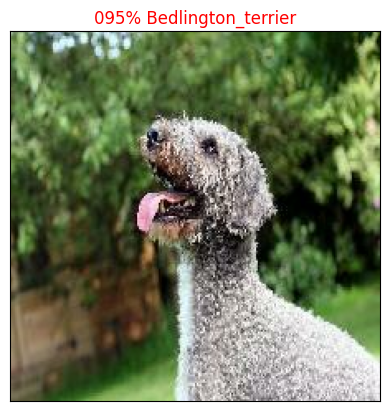

In [99]:
plot_prediction(predictions, valid_labels, valid_images, n=20)

Definiše se funkcija plot_prediction_configuration koja se koristi za prikazivanje konfiguracije predviđanja tačnog rezultata vrste psa na osnovu slike. Rezultat izvršavanja ove funkcije je prikaz grafičke konfiguracije predikcije modela za odabrani unos podataka. Na bar-diagramu će biti prikazane najveće vrednosti verovatnoća predikcije, a zelena boja će označiti stvarnu oznaku klase ukoliko se ona nalazi među najvećim vrednostima.

In [47]:
def plot_prediction_configuration(prediction_prob, labels, n=1):
  pred_prob, label = prediction_prob[n], labels[n]
  pred_label = get_prediction_label(pred_prob)
  top_10_prediction_indx = pred_prob.argsort()[-10:][::-1]
  top_10_prediction_values = pred_prob[top_10_prediction_indx]
  top_10_prediction_labels = unique_breeds[top_10_prediction_indx]

  top_plot = plt.bar(np.arange(len(top_10_prediction_labels)),
                     top_10_prediction_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_prediction_labels)),
              labels = top_10_prediction_labels,
              rotation='vertical')
  if np.isin(label, top_10_prediction_labels):
    top_plot[np.argmax(top_10_prediction_labels==label)].set_color("green")

Prikaz konfiguracije predviđanja prikazuje histogram sa 10 najverovatnijih oznaka i odgovarajućim verovatnoćama predviđanja.

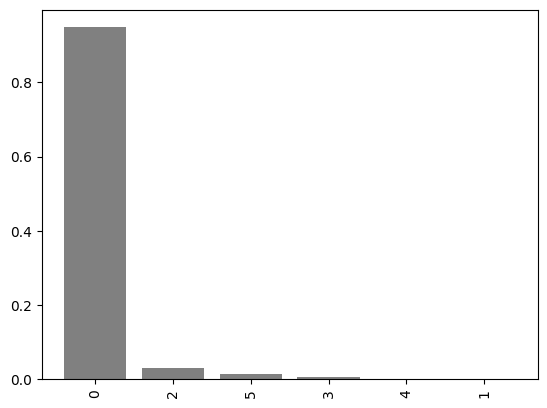

In [104]:
plot_prediction_configuration(predictions, valid_labels, n=20)

Prikazivanje rezultata predviđanja i konfiguracija predviđanja za više slika iz skupa podataka, što omogućava vizuelnu evaluaciju performansi modela na različitim slikama. U narednom koraku se vrši prikazivanje više slika i njihovih odgovarajućih predikcija korišćenjem dve funkcije: plot_prediction i plot_prediction_configuration. Koristeći petlju, prikazuje se nekoliko redova i kolona slika sa odgovarajućim predikcijama. Iako nailazimo na probleme zbog nacina strukture data seta

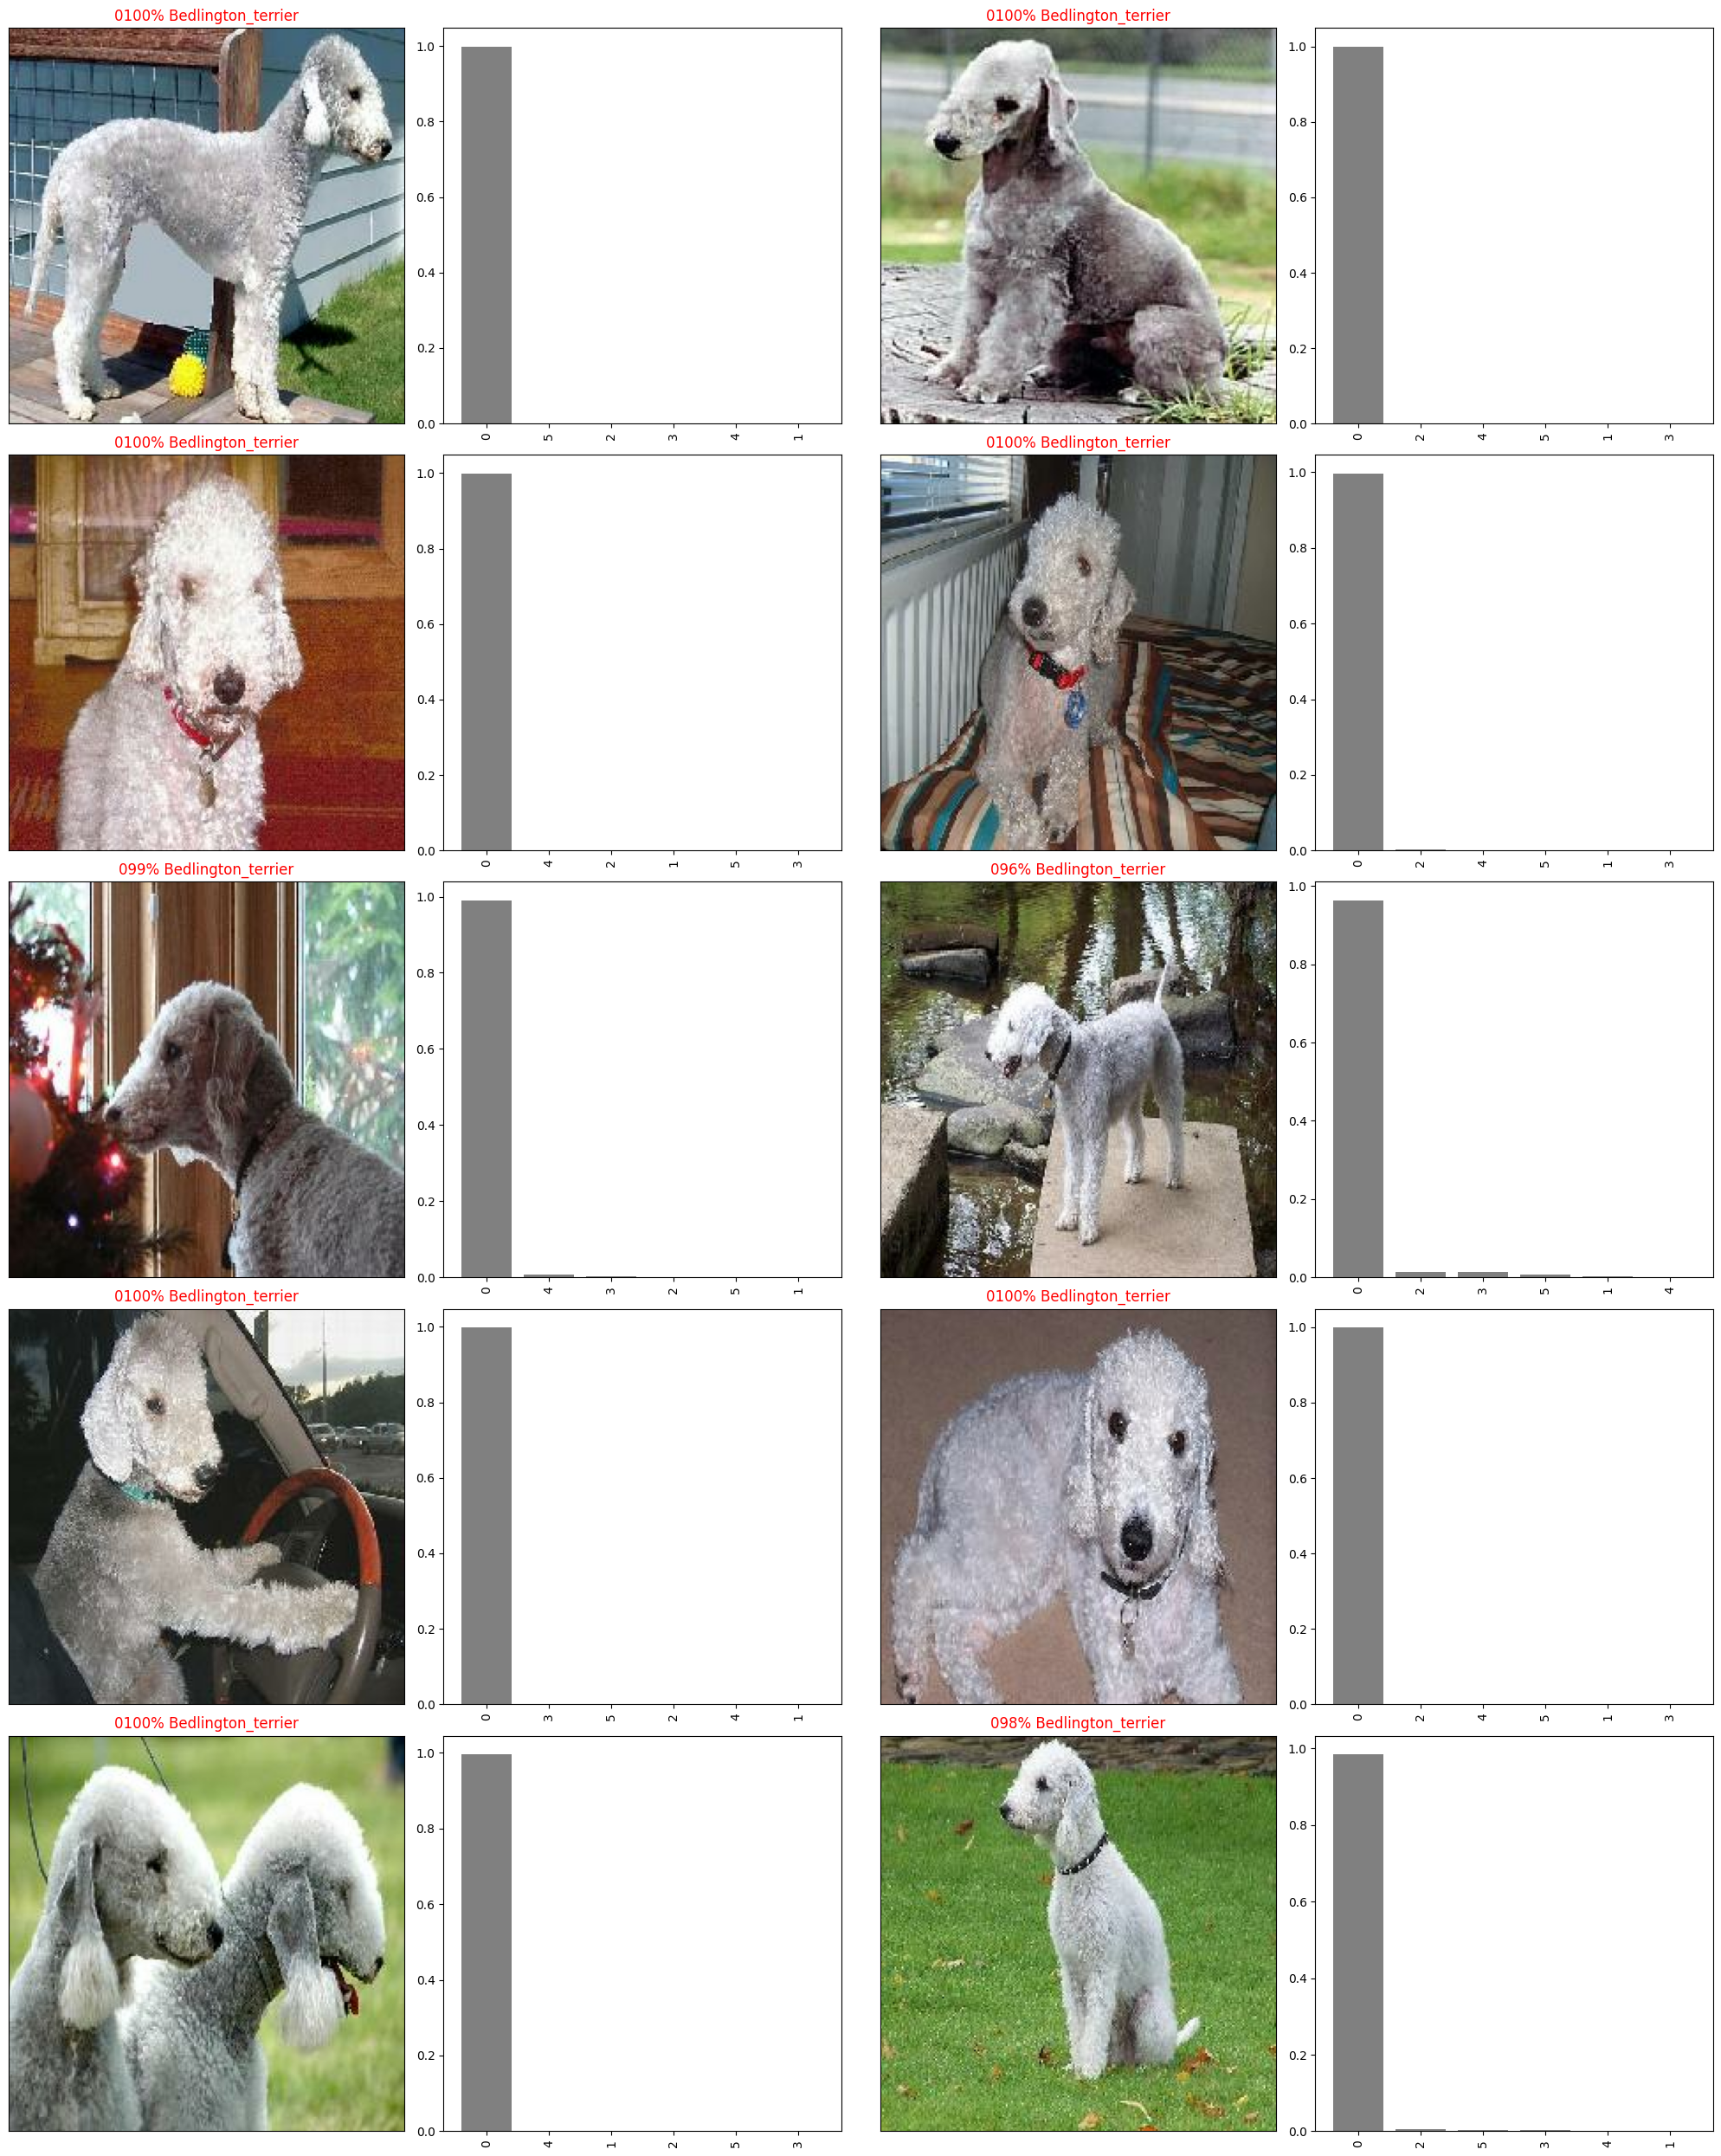

In [110]:
multiple = 50
row_number = 5
col_number = 2
image_number = row_number*col_number
plt.figure(figsize=(10*col_number, 5*row_number))
for i in range(image_number):
  plt.subplot(row_number, 2*col_number, 2*i+1)
  plot_prediction(predictions, valid_labels, valid_images, i+multiple)
  plt.subplot(row_number, 2*col_number, 2*i+2)
  plot_prediction_configuration(predictions, valid_labels, i+multiple)
plt.tight_layout(h_pad=1.0)
plt.show()

# Zaključak


Izrada ovog projekta bila je izuzetno uzbudljiva, a istraživanje područja Deep learning-a obogatilo me je novim iskustvom. Tokom projekta, posvetio sam vreme proučavanju različitih aspekata ovog područja. Iako sam zadovoljan postignutim rezultatima i tačnošću algoritma, uvek se trudim da pronađem nove načine kako bih ga dodatno unapredio i postigo još bolje rezultate. Ova tema postaje sve popularnija i primenljivija u današnjem vremenu, pružajući mi mogućnost da proširim svoje znanje u oblasti Deep learning-a.